In [1]:
import torch
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Dataset import Dataset
from Setting import Setting

torch.cuda.is_available()

False

# General settings

In [2]:
# Set the random seed for reproducibility.
random_seed = 1
#tf.random.set_random_seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)
np.random.seed(random_seed)

args = Setting()
device = args.device
dataset = Dataset(args.dataset_path, args.batch_size, args.fast_testing)

In [3]:
dataframe = dataset.data_full.drop_duplicates(subset=['UserID', 'MovieID', 'Timestamp'])
dataframe

,UserID,MovieID,CategoryID,Rating,Timestamp
474,101,177,4,4,874724710
178269,101,289,7,4,874724727
90841,101,153,0,4,874724754
45079,101,361,10,4,874724781
175466,101,321,0,4,874724843
...,...,...,...,...,...
98754,724,890,0,4,893286638
157460,724,652,0,4,893286638
98345,724,98,0,3,893286638
168106,724,130,7,4,893286638


# Timestamp convertion to datetime

In [4]:
# Converts timestamp in a DateTime object.
dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'], unit='s')
dataframe

,UserID,MovieID,CategoryID,Rating,Timestamp
474,101,177,4,4,1997-09-20 03:05:10
178269,101,289,7,4,1997-09-20 03:05:27
90841,101,153,0,4,1997-09-20 03:05:54
45079,101,361,10,4,1997-09-20 03:06:21
175466,101,321,0,4,1997-09-20 03:07:23
...,...,...,...,...,...
98754,724,890,0,4,1998-04-22 23:10:38
157460,724,652,0,4,1998-04-22 23:10:38
98345,724,98,0,3,1998-04-22 23:10:38
168106,724,130,7,4,1998-04-22 23:10:38


In [5]:
dataframe = dataframe.sort_values(by='Timestamp')
dataframe

,UserID,MovieID,CategoryID,Rating,Timestamp
474,101,177,4,4,1997-09-20 03:05:10
178269,101,289,7,4,1997-09-20 03:05:27
90841,101,153,0,4,1997-09-20 03:05:54
45079,101,361,10,4,1997-09-20 03:06:21
175466,101,321,0,4,1997-09-20 03:07:23
...,...,...,...,...,...
98754,724,890,0,4,1998-04-22 23:10:38
157460,724,652,0,4,1998-04-22 23:10:38
98345,724,98,0,3,1998-04-22 23:10:38
168106,724,130,7,4,1998-04-22 23:10:38


In [6]:
dataframe['Month'] = dataframe['Timestamp'].dt.to_period('M')
dataframe

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
98754,724,890,0,4,1998-04-22 23:10:38,1998-04
157460,724,652,0,4,1998-04-22 23:10:38,1998-04
98345,724,98,0,3,1998-04-22 23:10:38,1998-04
168106,724,130,7,4,1998-04-22 23:10:38,1998-04


In [7]:
distribution_per_month = dataframe['Month'].value_counts().sort_index()
distribution_per_month

1997-09     6704
1997-10    10304
1997-11    23980
1997-12    11911
1998-01    14095
1998-02    10991
1998-03    12656
1998-04     9359
Freq: M, Name: Month, dtype: int64

In [8]:
dataframe_user_101 = dataframe[dataframe['UserID'] == 101]
dataframe_user_101

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
3723,101,732,7,4,1997-09-20 03:08:02,1997-09
23065,101,1006,4,4,1997-09-20 03:08:02,1997-09
55627,101,60,10,3,1997-09-20 03:08:25,1997-09
181097,101,971,7,4,1997-09-20 03:08:57,1997-09
349,101,140,0,4,1997-09-20 03:09:48,1997-09


# UPD computation

## UPD functions

In [9]:
def get_genres_encoding(user_items):
    items = dataset.movies_data[dataset.movies_data['MovieID'].isin(user_items)]
    category_columns = items.columns[1:]
    encoding = items[category_columns].apply(lambda x: 1 if x.any() else 0, axis=0)
    return encoding.values

In [10]:
def compute_upd(dataframe, user_id, start_date, end_date):
    user_dataframe = dataframe[dataframe['UserID'] == user_id]
    
    user_curr_dataframe = user_dataframe[user_dataframe['Timestamp'].between(start_date, end_date)]
    user_prev_dataframe = user_dataframe[user_dataframe['Timestamp'] < start_date]
    
    user_curr_items = user_curr_dataframe['MovieID'].values
    user_prev_items = user_prev_dataframe['MovieID'].values
    
    user_curr_genres = get_genres_encoding(user_curr_items)
    user_prev_genres = get_genres_encoding(user_prev_items)
    
    numerator = np.count_nonzero(np.logical_and(user_curr_genres, user_prev_genres))
    denominator = np.count_nonzero(np.logical_or(user_curr_genres, user_prev_genres))
    
    if denominator != 0:
        upd_value = 1 - numerator / denominator
    else:
        upd_value = -100
        
    return upd_value

## First time slot

In [11]:
start_date_slot_1 = pd.to_datetime('1997-09-20')
end_date_slot_1 = pd.to_datetime('1997-11-01')
dataframe_1 = dataframe[dataframe['Timestamp'].between(start_date_slot_1, end_date_slot_1)]
dataframe_1 = dataframe_1.sort_values(by='Timestamp')
dataframe_1

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
45918,92,204,7,4,1997-10-31 23:41:55,1997-10
45419,92,24,2,4,1997-10-31 23:41:55,1997-10
2661,92,68,7,4,1997-10-31 23:42:23,1997-10
39628,92,452,0,4,1997-10-31 23:42:23,1997-10


In [12]:
test_start_date_slot_1 = pd.to_datetime('1997-10-01')
test_end_date_slot_1 = pd.to_datetime('1997-11-01')

upd_values_slot_1 = np.zeros(dataset.n_users)

for i in range(dataset.n_users):
    upd_value = compute_upd(dataframe=dataframe_1, user_id=i, start_date=test_start_date_slot_1, end_date=test_end_date_slot_1)
    upd_values_slot_1[i] = upd_value

In [13]:
# We remove zeros.
upd_values_slot_1 = upd_values_slot_1[upd_values_slot_1 != -100]

In [14]:
bins = [0, 0.5, 0.75, 1.0]
histogram, bin_edges = np.histogram(upd_values_slot_1, bins=bins)
total_values = len(upd_values_slot_1)
percentage_less_than_05_slot_1 = (histogram[0] / total_values) * 100
percentage_between_05_and_075_slot_1 = (histogram[1] / total_values) * 100
percentage_greater_than_075_slot_1 = (histogram[2] / total_values) * 100

print("Percentuale di valori <= 0.5:", percentage_less_than_05_slot_1, "%")
print("Percentuale di valori compresi tra 0.5 e 0.75:", percentage_between_05_and_075_slot_1, "%")
print("Percentuale di valori >= 0.75:", percentage_greater_than_075_slot_1, "%")

Percentuale di valori <= 0.5: 13.684210526315791 %
Percentuale di valori compresi tra 0.5 e 0.75: 7.368421052631578 %
Percentuale di valori >= 0.75: 78.94736842105263 %


## Second time slot

In [15]:
start_date_slot_1 = pd.to_datetime('1997-09-20')
start_date_slot_2 = pd.to_datetime('1997-11-01')
end_date_slot_2 = pd.to_datetime('1998-01-01')
dataframe_2 = dataframe[dataframe['Timestamp'].between(start_date_slot_1, end_date_slot_2)]
dataframe_2 = dataframe_2.sort_values(by='Timestamp')
dataframe_2

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
152165,288,48,5,4,1997-12-31 23:38:02,1997-12
38809,288,1167,2,3,1997-12-31 23:38:33,1997-12
62684,92,719,0,4,1997-12-31 23:51:08,1997-12
386,92,95,4,4,1997-12-31 23:52:36,1997-12


In [16]:
test_start_date_slot_2 = pd.to_datetime('1997-12-01')
test_end_date_slot_2 = pd.to_datetime('1998-01-01')

upd_values_slot_2 = np.zeros(dataset.n_users)

for i in range(dataset.n_users):
    upd_value = compute_upd(dataframe=dataframe_2, user_id=i, start_date=test_start_date_slot_2, end_date=test_end_date_slot_2)
    upd_values_slot_2[i] = upd_value

In [17]:
# We remove zeros.
upd_values_slot_2 = upd_values_slot_2[upd_values_slot_2 != -100]

In [18]:
bins = [0, 0.5, 0.75, 1.0]
histogram, bin_edges = np.histogram(upd_values_slot_2, bins=bins)
total_values = len(upd_values_slot_2)
percentage_less_than_05_slot_2 = (histogram[0] / total_values) * 100
percentage_between_05_and_075_slot_2 = (histogram[1] / total_values) * 100
percentage_greater_than_075_slot_2 = (histogram[2] / total_values) * 100

print("Percentuale di valori <= 0.5:", percentage_less_than_05_slot_2, "%")
print("Percentuale di valori compresi tra 0.5 e 0.75:", percentage_between_05_and_075_slot_2, "%")
print("Percentuale di valori >= 0.75:", percentage_greater_than_075_slot_2, "%")

Percentuale di valori <= 0.5: 8.30188679245283 %
Percentuale di valori compresi tra 0.5 e 0.75: 4.528301886792453 %
Percentuale di valori >= 0.75: 87.16981132075472 %


## Third time slot

In [19]:
start_date_slot_1 = pd.to_datetime('1997-09-20')
start_date_slot_3 = pd.to_datetime('1998-01-01')
end_date_slot_3 = pd.to_datetime('1998-03-01')
dataframe_3 = dataframe[dataframe['Timestamp'].between(start_date_slot_1, end_date_slot_3)]
dataframe_3 = dataframe_3.sort_values(by='Timestamp')
dataframe_3

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
35133,232,181,0,4,1998-02-28 22:45:39,1998-02
1563,232,464,1,3,1998-02-28 22:46:06,1998-02
179112,232,1104,7,3,1998-02-28 22:46:28,1998-02
5506,232,514,4,2,1998-02-28 22:47:17,1998-02


In [20]:
test_start_date_slot_3 = pd.to_datetime('1998-02-01')
test_end_date_slot_3 = pd.to_datetime('1998-03-01')

upd_values_slot_3 = np.zeros(dataset.n_users)

for i in range(dataset.n_users):
    upd_value = compute_upd(dataframe=dataframe_3, user_id=i, start_date=test_start_date_slot_3, end_date=test_end_date_slot_3)
    upd_values_slot_3[i] = upd_value

In [21]:
# We remove zeros.
upd_values_slot_3 = upd_values_slot_3[upd_values_slot_3 != -100]

In [22]:
bins = [0, 0.5, 0.75, 1.0]
histogram, bin_edges = np.histogram(upd_values_slot_3, bins=bins)
total_values = len(upd_values_slot_3)
percentage_less_than_05_slot_3 = (histogram[0] / total_values) * 100
percentage_between_05_and_075_slot_3 = (histogram[1] / total_values) * 100
percentage_greater_than_075_slot_3 = (histogram[2] / total_values) * 100

print("Percentuale di valori <= 0.5:", percentage_less_than_05_slot_3, "%")
print("Percentuale di valori compresi tra 0.5 e 0.75:", percentage_between_05_and_075_slot_3, "%")
print("Percentuale di valori >= 0.75:", percentage_greater_than_075_slot_3, "%")

Percentuale di valori <= 0.5: 4.211956521739131 %
Percentuale di valori compresi tra 0.5 e 0.75: 4.891304347826087 %
Percentuale di valori >= 0.75: 90.89673913043478 %


## Fourth time slot

In [23]:
start_date_slot_1 = pd.to_datetime('1997-09-20')
start_date_slot_4 = pd.to_datetime('1998-03-01')
end_date_slot_4 = pd.to_datetime('1998-05-01')
dataframe_4 = dataframe[dataframe['Timestamp'].between(start_date_slot_1, end_date_slot_4)]
dataframe_4 = dataframe_4.sort_values(by='Timestamp')
dataframe_4

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
168106,724,130,7,4,1998-04-22 23:10:38,1998-04
110040,724,280,12,4,1998-04-22 23:10:38,1998-04
136132,724,175,0,4,1998-04-22 23:10:38,1998-04
98754,724,890,0,4,1998-04-22 23:10:38,1998-04


In [24]:
test_start_date_slot_4 = pd.to_datetime('1998-04-01')
test_end_date_slot_4 = pd.to_datetime('1998-05-01')

upd_values_slot_4 = np.zeros(dataset.n_users)

for i in range(dataset.n_users):
    upd_value = compute_upd(dataframe=dataframe_4, user_id=i, start_date=test_start_date_slot_4, end_date=test_end_date_slot_4)
    upd_values_slot_4[i] = upd_value

In [25]:
# We remove zeros.
upd_values_slot_4 = upd_values_slot_4[upd_values_slot_4 != -100]

In [26]:
bins = [0, 0.5, 0.75, 1.0]
histogram, bin_edges = np.histogram(upd_values_slot_4, bins=bins)
total_values = len(upd_values_slot_4)
percentage_less_than_05_slot_4 = (histogram[0] / total_values) * 100
percentage_between_05_and_075_slot_4 = (histogram[1] / total_values) * 100
percentage_greater_than_075_slot_4 = (histogram[2] / total_values) * 100

print("Percentuale di valori <= 0.5:", percentage_less_than_05_slot_4, "%")
print("Percentuale di valori compresi tra 0.5 e 0.75:", percentage_between_05_and_075_slot_4, "%")
print("Percentuale di valori >= 0.75:", percentage_greater_than_075_slot_4, "%")

Percentuale di valori <= 0.5: 3.8176033934252387 %
Percentuale di valori compresi tra 0.5 e 0.75: 3.1813361611876987 %
Percentuale di valori >= 0.75: 93.00106044538707 %


## Plot

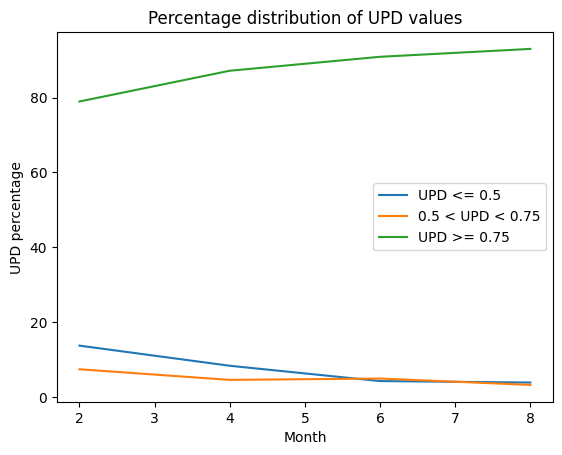

In [27]:
percentage_less_than_05 = [percentage_less_than_05_slot_1, percentage_less_than_05_slot_2,
                           percentage_less_than_05_slot_3, percentage_less_than_05_slot_4]
percentage_between_05_and_075 = [percentage_between_05_and_075_slot_1, percentage_between_05_and_075_slot_2,
                                 percentage_between_05_and_075_slot_3, percentage_between_05_and_075_slot_4]
percentage_greater_than_075 = [percentage_greater_than_075_slot_1, percentage_greater_than_075_slot_2,
                               percentage_greater_than_075_slot_3, percentage_greater_than_075_slot_4]
months = [2, 4, 6, 8]

num_colors = len(months)
palette = sns.color_palette("viridis", num_colors)

plt.plot(months, percentage_less_than_05, label=f'UPD <= 0.5')
plt.plot(months, percentage_between_05_and_075, label=f'0.5 < UPD < 0.75')
plt.plot(months, percentage_greater_than_075, label=f'UPD >= 0.75')

plt.xlabel('Month')
plt.ylabel('UPD percentage')
plt.title('Percentage distribution of UPD values')
plt.legend()
plt.show()

In [28]:
df = pd.DataFrame()
df

""


In [29]:
df['UPD <= 0.5'] = percentage_less_than_05
df['0.5 < UPD < 0.75'] = percentage_between_05_and_075
df['UPD >= 0.75'] = percentage_greater_than_075
df = df.apply(pd.to_numeric, errors='coerce')
df

,UPD <= 0.5,0.5 < UPD < 0.75,UPD >= 0.75
0,13.684211,7.368421,78.947368
1,8.301887,4.528302,87.169811
2,4.211957,4.891304,90.896739
3,3.817603,3.181336,93.001060


# Modified UPD computation

## Modified UPD functions

In [30]:
def get_genres_encoding(user_items):
    items = dataset.movies_data[dataset.movies_data['MovieID'].isin(user_items)]
    category_columns = items.columns[1:]
    one_hot_encoding = items[category_columns].apply(lambda x: 1 if x.any() else 0, axis=0)
    return one_hot_encoding.values

In [31]:
def compute_modified_upd(dataframe, user_id, prev_start_date, prev_end_date, curr_start_date, curr_end_date):
    user_dataframe = dataframe[dataframe['UserID'] == user_id]
    
    user_curr_dataframe = user_dataframe[user_dataframe['Timestamp'].between(curr_start_date, curr_end_date)]
    user_prev_dataframe = user_dataframe[user_dataframe['Timestamp'].between(prev_start_date, prev_end_date)]
    
    user_curr_items = user_curr_dataframe['MovieID'].values
    user_prev_items = user_prev_dataframe['MovieID'].values
    
    user_curr_genres = get_genres_encoding(user_curr_items)
    user_prev_genres = get_genres_encoding(user_prev_items)
    
    numerator = np.count_nonzero(np.logical_and(user_curr_genres, user_prev_genres))
    denominator = np.count_nonzero(np.logical_or(user_curr_genres, user_prev_genres))
    
    if denominator != 0:
        upd_value = 1 - numerator / denominator
    else:
        upd_value = -100
        
    return upd_value

## First time slot

In [32]:
start_date_slot_1 = pd.to_datetime('1997-09-20')
end_date_slot_1 = pd.to_datetime('1997-11-01')
dataframe_1 = dataframe[dataframe['Timestamp'].between(start_date_slot_1, end_date_slot_1)]
dataframe_1 = dataframe_1.sort_values(by='Timestamp')
dataframe_1

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
45918,92,204,7,4,1997-10-31 23:41:55,1997-10
45419,92,24,2,4,1997-10-31 23:41:55,1997-10
2661,92,68,7,4,1997-10-31 23:42:23,1997-10
39628,92,452,0,4,1997-10-31 23:42:23,1997-10


In [33]:
test_prev_start_date_slot_1 = pd.to_datetime('1997-09-20')
test_prev_end_date_slot_1 = pd.to_datetime('1997-10-01')
test_curr_start_date_slot_1 = pd.to_datetime('1997-10-01')
test_curr_end_date_slot_1 = pd.to_datetime('1997-11-01')

upd_values_slot_1 = np.zeros(dataset.n_users)

for i in range(dataset.n_users):
    upd_value = compute_modified_upd(dataframe=dataframe_1, user_id=i, 
                                     prev_start_date=test_prev_start_date_slot_1, 
                                     prev_end_date=test_prev_end_date_slot_1,
                                     curr_start_date=test_curr_start_date_slot_1, 
                                     curr_end_date=test_curr_end_date_slot_1)
    upd_values_slot_1[i] = upd_value

In [34]:
# We remove zeros.
upd_values_slot_1 = upd_values_slot_1[upd_values_slot_1 != -100]

In [35]:
bins = [0, 0.5, 0.75, 1.0]
histogram, bin_edges = np.histogram(upd_values_slot_1, bins=bins)
total_values = len(upd_values_slot_1)
percentage_less_than_05_slot_1 = (histogram[0] / total_values) * 100
percentage_between_05_and_075_slot_1 = (histogram[1] / total_values) * 100
percentage_greater_than_075_slot_1 = (histogram[2] / total_values) * 100

print("Percentuale di valori <= 0.5:", percentage_less_than_05_slot_1, "%")
print("Percentuale di valori compresi tra 0.5 e 0.75:", percentage_between_05_and_075_slot_1, "%")
print("Percentuale di valori >= 0.75:", percentage_greater_than_075_slot_1, "%")

Percentuale di valori <= 0.5: 13.684210526315791 %
Percentuale di valori compresi tra 0.5 e 0.75: 7.368421052631578 %
Percentuale di valori >= 0.75: 78.94736842105263 %


## Second time slot

In [36]:
start_date_slot_1 = pd.to_datetime('1997-09-20')
start_date_slot_2 = pd.to_datetime('1997-11-01')
end_date_slot_2 = pd.to_datetime('1998-01-01')
dataframe_2 = dataframe[dataframe['Timestamp'].between(start_date_slot_1, end_date_slot_2)]
dataframe_2 = dataframe_2.sort_values(by='Timestamp')
dataframe_2

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
152165,288,48,5,4,1997-12-31 23:38:02,1997-12
38809,288,1167,2,3,1997-12-31 23:38:33,1997-12
62684,92,719,0,4,1997-12-31 23:51:08,1997-12
386,92,95,4,4,1997-12-31 23:52:36,1997-12


In [37]:
test_prev_start_date_slot_2 = pd.to_datetime('1997-11-01')
test_prev_end_date_slot_2 = pd.to_datetime('1997-12-01')
test_curr_start_date_slot_2 = pd.to_datetime('1997-12-01')
test_curr_end_date_slot_2 = pd.to_datetime('1998-01-01')

upd_values_slot_2 = np.zeros(dataset.n_users)

for i in range(dataset.n_users):
    upd_value = compute_modified_upd(dataframe=dataframe_2, user_id=i, 
                                     prev_start_date=test_prev_start_date_slot_2, 
                                     prev_end_date=test_prev_end_date_slot_2,
                                     curr_start_date=test_curr_start_date_slot_2, 
                                     curr_end_date=test_curr_end_date_slot_2)
    upd_values_slot_2[i] = upd_value

In [38]:
# We remove zeros.
upd_values_slot_2 = upd_values_slot_2[upd_values_slot_2 != -100]

In [39]:
bins = [0, 0.5, 0.75, 1.0]
histogram, bin_edges = np.histogram(upd_values_slot_2, bins=bins)
total_values = len(upd_values_slot_2)
percentage_less_than_05_slot_2 = (histogram[0] / total_values) * 100
percentage_between_05_and_075_slot_2 = (histogram[1] / total_values) * 100
percentage_greater_than_075_slot_2 = (histogram[2] / total_values) * 100

print("Percentuale di valori <= 0.5:", percentage_less_than_05_slot_2, "%")
print("Percentuale di valori compresi tra 0.5 e 0.75:", percentage_between_05_and_075_slot_2, "%")
print("Percentuale di valori >= 0.75:", percentage_greater_than_075_slot_2, "%")

Percentuale di valori <= 0.5: 9.022556390977442 %
Percentuale di valori compresi tra 0.5 e 0.75: 5.764411027568922 %
Percentuale di valori >= 0.75: 85.21303258145363 %


## Third time slot

In [40]:
start_date_slot_1 = pd.to_datetime('1997-09-20')
start_date_slot_3 = pd.to_datetime('1998-01-01')
end_date_slot_3 = pd.to_datetime('1998-03-01')
dataframe_3 = dataframe[dataframe['Timestamp'].between(start_date_slot_1, end_date_slot_3)]
dataframe_3 = dataframe_3.sort_values(by='Timestamp')
dataframe_3

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
35133,232,181,0,4,1998-02-28 22:45:39,1998-02
1563,232,464,1,3,1998-02-28 22:46:06,1998-02
179112,232,1104,7,3,1998-02-28 22:46:28,1998-02
5506,232,514,4,2,1998-02-28 22:47:17,1998-02


In [41]:
test_prev_start_date_slot_3 = pd.to_datetime('1998-01-01')
test_prev_end_date_slot_3 = pd.to_datetime('1998-02-01')
test_curr_start_date_slot_3 = pd.to_datetime('1998-02-01')
test_curr_end_date_slot_3 = pd.to_datetime('1998-03-01')

upd_values_slot_3 = np.zeros(dataset.n_users)

for i in range(dataset.n_users):
    upd_value = compute_modified_upd(dataframe=dataframe_3, user_id=i, 
                                     prev_start_date=test_prev_start_date_slot_3, 
                                     prev_end_date=test_prev_end_date_slot_3,
                                     curr_start_date=test_curr_start_date_slot_3, 
                                     curr_end_date=test_curr_end_date_slot_3)
    upd_values_slot_3[i] = upd_value

In [42]:
# We remove zeros.
upd_values_slot_3 = upd_values_slot_3[upd_values_slot_3 != -100]

In [43]:
bins = [0, 0.5, 0.75, 1.0]
histogram, bin_edges = np.histogram(upd_values_slot_3, bins=bins)
total_values = len(upd_values_slot_3)
percentage_less_than_05_slot_3 = (histogram[0] / total_values) * 100
percentage_between_05_and_075_slot_3 = (histogram[1] / total_values) * 100
percentage_greater_than_075_slot_3 = (histogram[2] / total_values) * 100

print("Percentuale di valori <= 0.5:", percentage_less_than_05_slot_3, "%")
print("Percentuale di valori compresi tra 0.5 e 0.75:", percentage_between_05_and_075_slot_3, "%")
print("Percentuale di valori >= 0.75:", percentage_greater_than_075_slot_3, "%")

Percentuale di valori <= 0.5: 5.7926829268292686 %
Percentuale di valori compresi tra 0.5 e 0.75: 10.975609756097562 %
Percentuale di valori >= 0.75: 83.23170731707317 %


## Fourth time slot

In [44]:
start_date_slot_1 = pd.to_datetime('1997-09-20')
start_date_slot_4 = pd.to_datetime('1998-03-01')
end_date_slot_4 = pd.to_datetime('1998-05-01')
dataframe_4 = dataframe[dataframe['Timestamp'].between(start_date_slot_1, end_date_slot_4)]
dataframe_4 = dataframe_4.sort_values(by='Timestamp')
dataframe_4

,UserID,MovieID,CategoryID,Rating,Timestamp,Month
474,101,177,4,4,1997-09-20 03:05:10,1997-09
178269,101,289,7,4,1997-09-20 03:05:27,1997-09
90841,101,153,0,4,1997-09-20 03:05:54,1997-09
45079,101,361,10,4,1997-09-20 03:06:21,1997-09
175466,101,321,0,4,1997-09-20 03:07:23,1997-09
...,...,...,...,...,...,...
168106,724,130,7,4,1998-04-22 23:10:38,1998-04
110040,724,280,12,4,1998-04-22 23:10:38,1998-04
136132,724,175,0,4,1998-04-22 23:10:38,1998-04
98754,724,890,0,4,1998-04-22 23:10:38,1998-04


In [45]:
test_prev_start_date_slot_4 = pd.to_datetime('1998-03-01')
test_prev_end_date_slot_4 = pd.to_datetime('1998-04-01')
test_curr_start_date_slot_4 = pd.to_datetime('1998-04-01')
test_curr_end_date_slot_4 = pd.to_datetime('1998-05-01')

upd_values_slot_4 = np.zeros(dataset.n_users)

for i in range(dataset.n_users):
    upd_value = compute_modified_upd(dataframe=dataframe_4, user_id=i, 
                                     prev_start_date=test_prev_start_date_slot_4, 
                                     prev_end_date=test_prev_end_date_slot_4,
                                     curr_start_date=test_curr_start_date_slot_4, 
                                     curr_end_date=test_curr_end_date_slot_4)
    upd_values_slot_4[i] = upd_value

In [46]:
# We remove zeros.
upd_values_slot_4 = upd_values_slot_4[upd_values_slot_4 != -100]

In [47]:
bins = [0, 0.5, 0.75, 1.0]
histogram, bin_edges = np.histogram(upd_values_slot_4, bins=bins)
total_values = len(upd_values_slot_4)
percentage_less_than_05_slot_4 = (histogram[0] / total_values) * 100
percentage_between_05_and_075_slot_4 = (histogram[1] / total_values) * 100
percentage_greater_than_075_slot_4 = (histogram[2] / total_values) * 100

print("Percentuale di valori <= 0.5:", percentage_less_than_05_slot_4, "%")
print("Percentuale di valori compresi tra 0.5 e 0.75:", percentage_between_05_and_075_slot_4, "%")
print("Percentuale di valori >= 0.75:", percentage_greater_than_075_slot_4, "%")

Percentuale di valori <= 0.5: 7.033639143730887 %
Percentuale di valori compresi tra 0.5 e 0.75: 8.56269113149847 %
Percentuale di valori >= 0.75: 84.40366972477065 %


## Plot

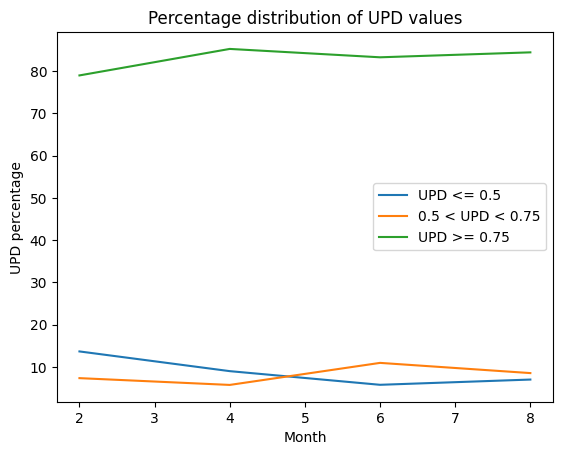

In [48]:
percentage_less_than_05 = [percentage_less_than_05_slot_1, percentage_less_than_05_slot_2,
                           percentage_less_than_05_slot_3, percentage_less_than_05_slot_4]
percentage_between_05_and_075 = [percentage_between_05_and_075_slot_1, percentage_between_05_and_075_slot_2,
                                 percentage_between_05_and_075_slot_3, percentage_between_05_and_075_slot_4]
percentage_greater_than_075 = [percentage_greater_than_075_slot_1, percentage_greater_than_075_slot_2,
                               percentage_greater_than_075_slot_3, percentage_greater_than_075_slot_4]
months = [2, 4, 6, 8]

plt.plot(months, percentage_less_than_05, label=f'UPD <= 0.5')
plt.plot(months, percentage_between_05_and_075, label=f'0.5 < UPD < 0.75')
plt.plot(months, percentage_greater_than_075, label=f'UPD >= 0.75')

plt.xlabel('Month')
plt.ylabel('UPD percentage')
plt.title('Percentage distribution of UPD values')
plt.legend()
plt.show()